In [110]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import os
import sys
import pandas as pd
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

## Cargar datos

In [111]:
#Informacion
dir_img=r'C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_learning'
clases=[]

In [112]:
##Obtener clases
clases=os.listdir(dir_img)
print(clases)

['fresh_grape', 'fresh_mango', 'fresh_peach', 'stale_grape', 'stale_mango', 'stale_peach']


In [113]:
##Obtener un DF con las rutas de las imagenes y su correspondiente etiqueta
def loadImg(clases,dir_img):    
    dir_clase=[]
    nombreImg=[]
    rutaImg=[]
    list_dirimg=[]
    etiquetas=[]
    for i in clases:
        dir_clase=os.path.join(dir_img,i)#Obtener la ruta de cada clase
        if os.path.isdir(dir_clase):     #Pregunta si el directorio existe
            nombreImg=os.listdir(dir_clase)  
            for j in nombreImg:
                rutaImg=os.path.join(dir_clase,j)#Obtener la ruta de cada imagen
                list_dirimg.append(rutaImg)      #Agrega un ítem al final de la lista.     
                etiquetas.append(i) 
    Rseries= pd.Series(list_dirimg, name='ruta_imagenes') #Vector con datos indexados
    Eseries=pd.Series(etiquetas, name='Etiqueta')    
    df=pd.concat([Rseries, Eseries], axis=1)
    return df

In [114]:
df=loadImg(clases,dir_img)

In [115]:
df

,ruta_imagenes,Etiqueta
0,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,fresh_grape
1,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,fresh_grape
2,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,fresh_grape
3,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,fresh_grape
4,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,fresh_grape
...,...,...
5480,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,stale_peach
5481,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,stale_peach
5482,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,stale_peach
5483,C:\Users\kvnsg\Desktop\ML\Proyecto\transfer_le...,stale_peach


In [116]:
df['Etiqueta'].value_counts()

stale_grape    923
stale_mango    917
fresh_mango    916
stale_peach    912
fresh_grape    911
fresh_peach    906
Name: Etiqueta, dtype: int64

<AxesSubplot:xlabel='Etiqueta', ylabel='count'>

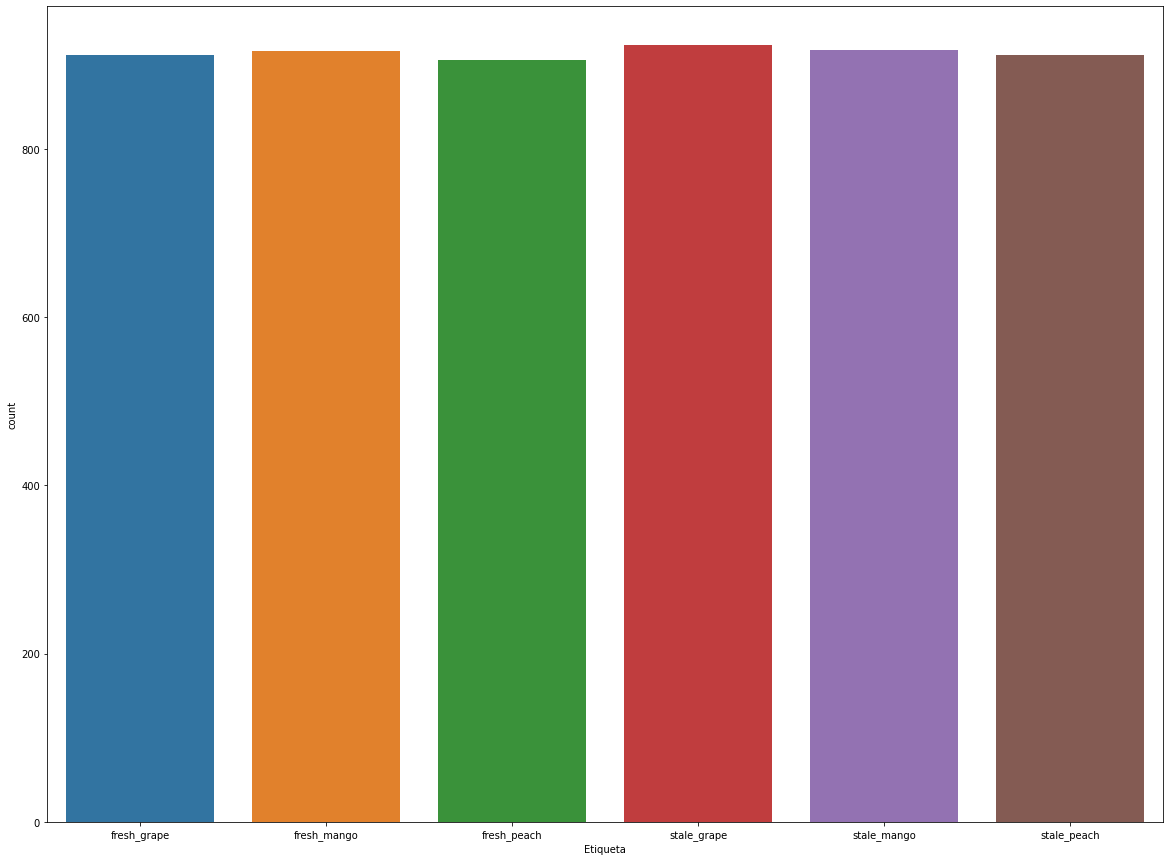

In [117]:
plt.figure(figsize=(20,15))
sns.countplot(x = 'Etiqueta',data=df)

## Mostrar imágenes

In [118]:
pltimg=[]
def mostrar(dfi, n):    
    fig=plt.figure(figsize=(20, 20))
    for i in range(1,n):
        ruta=dfi['ruta_imagenes'][random.randint(0,( len(dfi.index)-1) )]
        imgcv = cv2.imread(ruta)[:,:,::-1] #BGR (cv2) a RGB (matplotlib )
        pltimg.append(imgcv)
        fig.add_subplot(4, 4, i) 
        plt.imshow(pltimg[(i-1)])

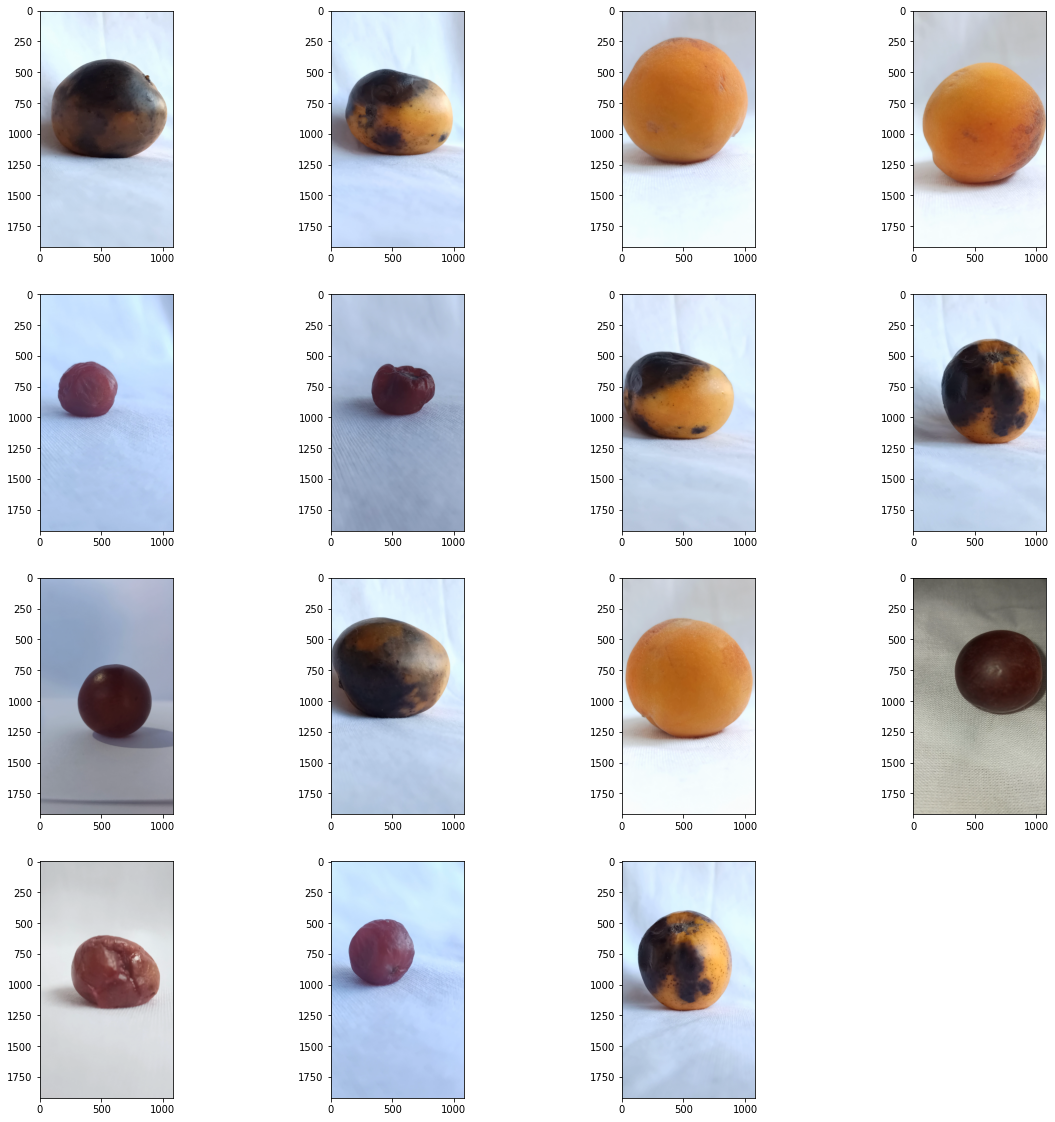

In [119]:
mostrar(df,16)

In [120]:
forma=[]
for i in range(1,16):
    forma.append(pltimg[i-1].shape)
df_pltimg=pd.DataFrame(forma, columns=['Alto', 'Ancho', 'Canal'])
df_pltimg

,Alto,Ancho,Canal
0,1920,1080,3
1,1920,1080,3
2,1920,1080,3
3,1920,1080,3
4,1920,1080,3
5,1920,1080,3
6,1920,1080,3
7,1920,1080,3
8,1920,1080,3
9,1920,1080,3


In [121]:
pltimg[13]

array([[[207, 237, 255],
        [207, 237, 255],
        [207, 237, 255],
        ...,
        [190, 217, 253],
        [190, 217, 253],
        [189, 216, 252]],

       [[207, 237, 255],
        [207, 237, 255],
        [207, 237, 255],
        ...,
        [190, 217, 253],
        [190, 217, 253],
        [189, 216, 252]],

       [[207, 237, 255],
        [207, 237, 255],
        [207, 237, 255],
        ...,
        [190, 217, 253],
        [190, 217, 253],
        [189, 216, 252]],

       ...,

       [[173, 197, 235],
        [173, 197, 235],
        [173, 197, 235],
        ...,
        [180, 201, 242],
        [180, 201, 242],
        [180, 201, 242]],

       [[173, 197, 235],
        [173, 197, 235],
        [173, 197, 235],
        ...,
        [180, 201, 242],
        [180, 201, 242],
        [180, 201, 242]],

       [[173, 197, 235],
        [173, 197, 235],
        [173, 197, 235],
        ...,
        [180, 201, 242],
        [180, 201, 242],
        [180, 201, 242]]

## train, test

In [122]:
train_split=0.8 #Porcentaje de datos que se va a tomar para el entrenamiento
train_df, test_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
print ('train_df: ', len(train_df), '  test_df: ', len(test_df))

train_df:  4388   test_df:  1097


## Procesamiento de imágenes

In [123]:
train_datagen=ImageDataGenerator(
    rescale=1/255, #Mayor eficiencia
    rotation_range=5,
    shear_range=0.1, #Inclina las imágenes
    zoom_range=0.01,  #Hacer zoom a las imágenes
)

In [124]:
test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [125]:
def aumentoDatos(df,datagen,bs,x):
    imGen=datagen.flow_from_dataframe( 
        df,
        directory=None,
        x_col=x, 
        y_col='Etiqueta',
        weight_col=None,
        target_size=(128,128),
        color_mode='rgb',
        classes=None,
        class_mode='categorical',
        batch_size=bs)
    return imGen

In [126]:
gen_train=aumentoDatos(train_df,train_datagen,1,'ruta_imagenes')
gen_test=aumentoDatos(test_df,test_datagen,1,'ruta_imagenes')

Found 4388 validated image filenames belonging to 6 classes.
Found 1097 validated image filenames belonging to 6 classes.


In [127]:
pltimg=[]
def mostrarGen(gen, n):    
    fig=plt.figure(figsize=(20, 20))
    for i in range(1,n):
        imgcv,label =next(gen) #BGR (cv2) a RGB (matplotlib )
        pltimg.append(imgcv[0])
        fig.add_subplot(4, 4, i) 
        plt.imshow(pltimg[(i-1)])

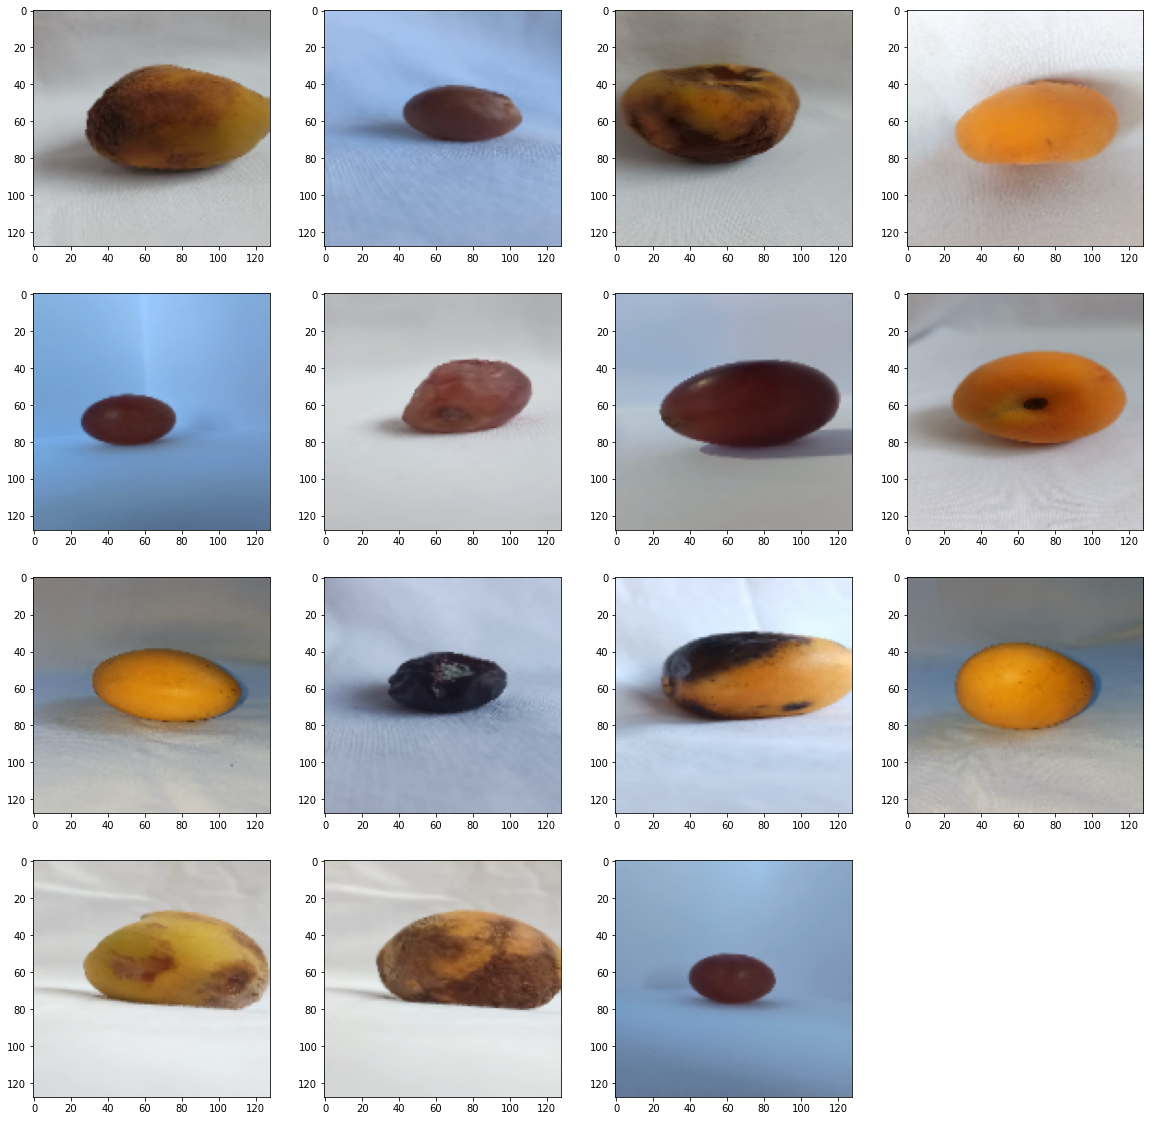

In [128]:
mostrarGen(gen_train, 16)

In [129]:
forma=[]
for i in range(1,16):
    forma.append(pltimg[i-1].shape)
df_pltimg=pd.DataFrame(forma, columns=['Alto', 'Ancho', 'Canal'])
df_pltimg

,Alto,Ancho,Canal
0,128,128,3
1,128,128,3
2,128,128,3
3,128,128,3
4,128,128,3
5,128,128,3
6,128,128,3
7,128,128,3
8,128,128,3
9,128,128,3


In [130]:
pltimg[14]

array([[[0.5751575 , 0.68235296, 0.79215693],
        [0.57557553, 0.68235296, 0.79215693],
        [0.5759936 , 0.68235296, 0.79215693],
        ...,
        [0.54509807, 0.65882355, 0.78823537],
        [0.54509807, 0.65882355, 0.78823537],
        [0.5422409 , 0.6559664 , 0.78537816]],

       [[0.5686275 , 0.68235296, 0.79215693],
        [0.5686275 , 0.68235296, 0.79215693],
        [0.5686275 , 0.68235296, 0.79215693],
        ...,
        [0.54509807, 0.65882355, 0.78823537],
        [0.54509807, 0.65882355, 0.78823537],
        [0.54203224, 0.6557577 , 0.78516954]],

       [[0.5686275 , 0.68235296, 0.79215693],
        [0.5686275 , 0.68235296, 0.79215693],
        [0.5686275 , 0.68235296, 0.79215693],
        ...,
        [0.54509807, 0.65882355, 0.78823537],
        [0.54509807, 0.65882355, 0.78823537],
        [0.54182357, 0.6555491 , 0.78496087]],

       ...,

       [[0.38389438, 0.4701689 , 0.59503   ],
        [0.3769101 , 0.4631846 , 0.57712984],
        [0.38523293, 0

## Transfer Learning

In [131]:
#Cargar modelo
modelFrutas=keras.models.load_model('frutas.h5')

In [132]:
modelFrutas.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)            

In [133]:
cnn=modelFrutas

In [134]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)            

In [135]:
cnn.pop()

In [136]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)            

In [137]:
for layer in cnn.layers:
    cnn.trainable=False

In [138]:
cnn.add(Dense(6,activation='softmax'))

In [139]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)            

In [140]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
cnn.fit_generator(gen_train,epochs=10,verbose=1, validation_data=gen_test,validation_steps=None, shuffle=False, initial_epoch=0)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 4388 steps, validate for 1097 steps
Epoch 1/10
4388/4388 [==============================] - 280s 64ms/step - loss: 0.6516 - accuracy: 0.7846 - val_loss: 0.2510 - val_accuracy: 0.9526
Epoch 2/10
4388/4388 [==============================] - 258s 59ms/step - loss: 0.3544 - accuracy: 0.8902 - val_loss: 0.1630 - val_accuracy: 0.9644
Epoch 3/10
4388/4388 [==============================] - 257s 58ms/step - loss: 0.2994 - accuracy: 0.8956 - val_loss: 0.1322 - val_accuracy: 0.9708
Epoch 4/10
4388/4388 [==============================] - 258s 59ms/step - loss: 0.2790 - accuracy: 0.9036 - val_loss: 0.1358 - val_accuracy: 0.9635
Epoch 5/10
4388/4388 [==============================] - 258s 59ms/step - loss: 0.2578 - accuracy: 0.9104 - val_loss: 0.0993 - val_accuracy: 0.9763
Epoch 6/10
4388/4388 [==============================] - 257s 58ms/step - loss: 0.2511 - accuracy: 0.9136 - val_loss: 0.1017 - val_accuracy: 0.9717
Epoch 7/10
4388/4388 [==============================] - 256s 58ms/step -

## Generar pérdida y accuracy

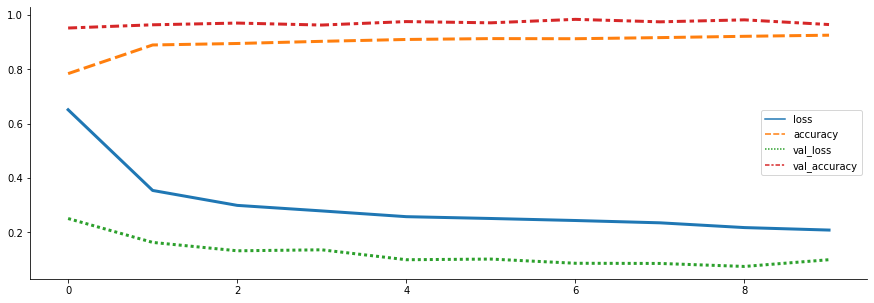

In [142]:
loss=pd.DataFrame(cnn.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

## Matriz de confusión

In [ ]:
# Determinar y_train, y_train_pred

In [145]:
def etiquetar(index): 
    if(index==0):
        et='fresh_grape'
    if(index==1):
        et='fresh_mango'
    if(index==2):
        et='fresh_peach'
    if(index==3):
        et='stale_grape'
    if(index==4):
        et='stale_mango'
    if(index==5):
        et='stale_peach' 
    return et

In [144]:
gen_train.class_indices

{'fresh_grape': 0,
 'fresh_mango': 1,
 'fresh_peach': 2,
 'stale_grape': 3,
 'stale_mango': 4,
 'stale_peach': 5}

In [146]:
lb_real=[]
lb_pred=[]
gen_train.reset()
for i in range(int(len(gen_train))):
    img, label=next(gen_train)
    pred=cnn.predict(img)
    id_real=label[0].tolist().index(1.)
    id_pred=pred[0].tolist().index(max(pred[0].tolist()))
    lb_real.append(etiquetar(id_real))
    lb_pred.append(etiquetar(id_pred))    
y_train=pd.Series(lb_real, name='Etiqueta')
y_train_pred=pd.Series(lb_pred, name='Etiqueta')

In [147]:
y_train_pred

0       fresh_mango
1       fresh_grape
2       fresh_grape
3       fresh_peach
4       stale_peach
           ...     
4383    stale_grape
4384    stale_peach
4385    stale_peach
4386    stale_grape
4387    stale_peach
Name: Etiqueta, Length: 4388, dtype: object

In [148]:
y_train

0       fresh_peach
1       fresh_grape
2       fresh_grape
3       fresh_peach
4       stale_peach
           ...     
4383    stale_grape
4384    stale_peach
4385    stale_peach
4386    stale_grape
4387    stale_peach
Name: Etiqueta, Length: 4388, dtype: object

In [149]:
confusion_matrix(y_train, y_train_pred)

array([[714,   0,   0,  13,   1,   0],
       [  0, 739,   0,   0,   0,   0],
       [  0, 146, 584,   0,   0,   2],
       [  5,   0,   0, 717,   2,   0],
       [  0,   0,   0,   0, 724,  16],
       [  0,   0,   0,   0,   0, 725]], dtype=int64)

## Reporte

In [150]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

 fresh_grape       0.99      0.98      0.99       728
 fresh_mango       0.84      1.00      0.91       739
 fresh_peach       1.00      0.80      0.89       732
 stale_grape       0.98      0.99      0.99       724
 stale_mango       1.00      0.98      0.99       740
 stale_peach       0.98      1.00      0.99       725

    accuracy                           0.96      4388
   macro avg       0.96      0.96      0.96      4388
weighted avg       0.96      0.96      0.96      4388



In [151]:
##Guardar Modelo

In [152]:
cnn.save('frutasTF.h5')